<a href="https://colab.research.google.com/github/adarshlearnngrow/StepUp-AI/blob/Clustering/ClusteringMentor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from openai import OpenAI
import json
import time
from google.colab import userdata

In [5]:
client = OpenAI(api_key=userdata.get("Open_AI_API_KEY"))

In [64]:
def generate_mentor_prompt(role, tech_skills, n=10):
    prompt = f"""
You are an assistant helping to create a database of expert mentors.

Generate {n} mentor profiles for the role: "{role}".

Each mentor should have:
- A realistic name
- A short professional bio (1–2 sentences)
- A list of 5–7 technical skills (from this list):
  {', '.join(tech_skills)}

Return the output in this JSON format:
[
  {{
    "name": "Mentor Name",
    "bio": "Short mentor bio.",
    "technical_skills": ["skill1", "skill2", ...]
  }},
  ...
]
"""
    return prompt

# Load role + skill data
with open("role_skills.json") as f:
    roles_data = json.load(f)

# Collection
all_mentors = []
mentor_counter = 1

# Generate mentors for each role
for role_info in roles_data:
    role = role_info["role"]
    tech_skills = role_info["technical_skills"]

    prompt = generate_mentor_prompt(role, tech_skills, n=25)

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.7
        )

        raw_output = response.choices[0].message.content.strip()
        mentors = json.loads(raw_output)

        for mentor in mentors:
            mentor["mentor_id"] = f"M{mentor_counter:04d}"
            mentor["role"] = role
            mentor_counter += 1

        all_mentors.extend(mentors)
        print(f"Added {len(mentors)} mentors for role: {role}")

    except Exception as e:
        print(f"Error processing role {role}: {e}")

# ✅ Save to JSON
with open("generated_mentors.json", "w") as f:
    json.dump(all_mentors, f, indent=2)

print(f"\n✅ All mentor profiles saved to 'generated_mentors.json' ({len(all_mentors)} total).")

Added 25 mentors for role: AI Engineer
Added 25 mentors for role: Business Analyst
Added 25 mentors for role: Business Intelligence Analyst
Added 24 mentors for role: Data Analyst
Added 24 mentors for role: Machine Learning

✅ All mentor profiles saved to 'generated_mentors.json' (123 total).


In [11]:
import pandas as pd

In [65]:
mentors_final_data = pd.read_json("generated_mentors.json")
mentors_final_data.head(5)

,name,bio,technical_skills,mentor_id,role
0,Alice Chen,AI Engineer with a passion for developing cutt...,"[Machine Learning, Artificial Intelligence, Da...",M0001,AI Engineer
1,David Kim,Experienced AI Engineer specializing in comput...,"[Machine Learning, Artificial Intelligence, Co...",M0002,AI Engineer
2,Sarah Liu,Data scientist turned AI Engineer with experti...,"[Artificial Intelligence, Natural Language Pro...",M0003,AI Engineer
3,Michael Wang,Software developer with a focus on AI and clou...,"[Artificial Intelligence, Cloud Computing, Sof...",M0004,AI Engineer
4,Emily Chen,AI Engineer with a background in data science ...,"[Artificial Intelligence, Data Analysis, Stati...",M0005,AI Engineer


In [66]:
mentors_final_data.set_index("mentor_id", inplace=True)

In [67]:
mentors_final_data.head(5)

,name,bio,technical_skills,role
mentor_id,,,,
M0001,Alice Chen,AI Engineer with a passion for developing cutt...,"[Machine Learning, Artificial Intelligence, Da...",AI Engineer
M0002,David Kim,Experienced AI Engineer specializing in comput...,"[Machine Learning, Artificial Intelligence, Co...",AI Engineer
M0003,Sarah Liu,Data scientist turned AI Engineer with experti...,"[Artificial Intelligence, Natural Language Pro...",AI Engineer
M0004,Michael Wang,Software developer with a focus on AI and clou...,"[Artificial Intelligence, Cloud Computing, Sof...",AI Engineer
M0005,Emily Chen,AI Engineer with a background in data science ...,"[Artificial Intelligence, Data Analysis, Stati...",AI Engineer


In [68]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
skills_matrix = mlb.fit_transform(mentors_final_data['technical_skills'])

skills_df = pd.DataFrame(skills_matrix, columns=mlb.classes_, index=mentors_final_data.index)


skills_df.head(5)

,API Development,Advanced Excel Skills,Agile Methodologies,Algorithm Development,Artificial Intelligence,Big Data Technologies,"Big Data Technologies (Hadoop, Spark)",Business Intelligence Reporting,Business Intelligence Tools,Business Process Modeling,...,Statistical Analysis (Python),Statistical Analysis (R),"Statistical Analysis (R, Python, SAS)",Statistical Analysis (SAS),Statistical Analysis Software,Statistical Modeling,"Statistical Software (SAS, MATLAB)",Statistical Software Proficiency,Testing and Quality Assurance,Version Control (Git)
mentor_id,,,,,,,,,,,,,,,,,,,,,
M0001,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M0002,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M0003,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M0004,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M0005,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

mentors_final_data["skills_str"] = mentors_final_data['technical_skills'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
skill_matrix = vectorizer.fit_transform(mentors_final_data["skills_str"])

skills_df = pd.DataFrame(skills_matrix, columns=mlb.classes_, index=mentors_final_data.index)


skills_df.head(5)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,API Development,Advanced Excel Skills,Agile Methodologies,Algorithm Development,Artificial Intelligence,Big Data Technologies,"Big Data Technologies (Hadoop, Spark)",Business Intelligence Reporting,Business Intelligence Tools,Business Process Modeling,...,Requirements Gathering,SQL,Software Development,Statistical Analysis,Statistical Analysis Software,Statistical Modeling,"Statistical Software (SAS, MATLAB)",Statistical Software Proficiency,Testing and Quality Assurance,Version Control (Git)
mentor_id,,,,,,,,,,,,,,,,,,,,,
M0001,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
M0002,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M0003,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M0004,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
M0005,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

✅ Best K = 29 with silhouette score = 0.5419


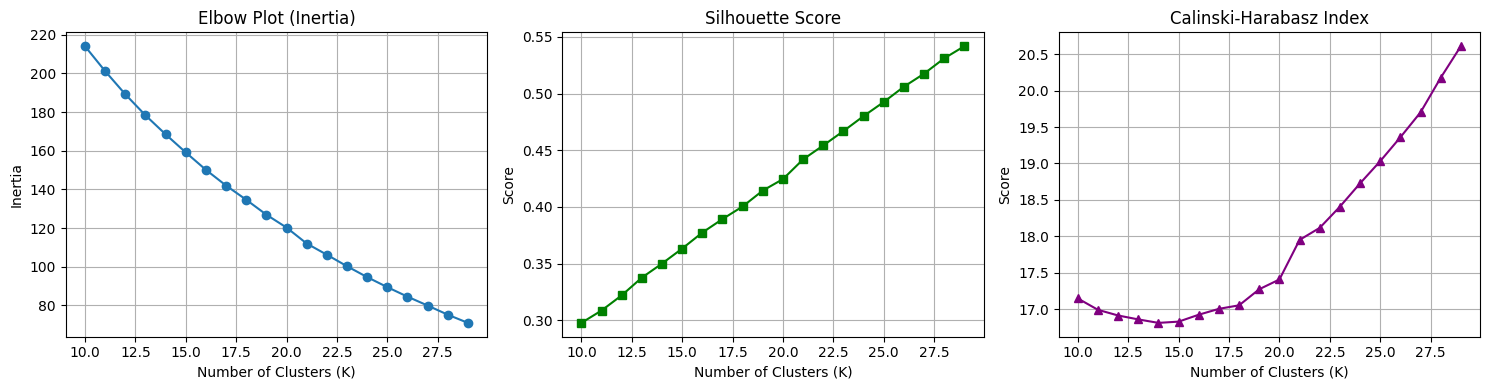

In [85]:


k_val = np.arange(10, 30)
best_k = None
best_score = -1
shilloutte_scores = []
inertias = []
ch_indexs = []

for k in k_val:
    temp_sil_scores = []
    temp_ch_scores = []
    temp_inertias = []

    for run in range(100):  # 100 is heavy; reduce to 5 or 10 for dev
        kmeans = KMeans(n_clusters=k, random_state=run, n_init='auto')
        labels = kmeans.fit_predict(skills_df)

        sil_score = silhouette_score(skills_df, labels)
        ch_index = calinski_harabasz_score(skills_df, labels)

        temp_sil_scores.append(sil_score)
        temp_ch_scores.append(ch_index)
        temp_inertias.append(kmeans.inertia_)

    # Average over all runs
    avg_sil = np.mean(temp_sil_scores)
    avg_ch = np.mean(temp_ch_scores)
    avg_inertia = np.mean(temp_inertias)

    shilloutte_scores.append(avg_sil)
    ch_indexs.append(avg_ch)
    inertias.append(avg_inertia)

    if avg_sil > best_score:
        best_score = avg_sil
        best_k = k

print(f"✅ Best K = {best_k} with silhouette score = {best_score:.4f}")

# 📈 Plot all 3 metrics
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(k_val, inertias, marker='o')
plt.title("Elbow Plot (Inertia)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_val, shilloutte_scores, marker='s', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Score")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_val, ch_indexs, marker='^', color='purple')
plt.title("Calinski-Harabasz Index")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Score")
plt.grid(True)

plt.tight_layout()
plt.show()


In [110]:
import joblib  # or use pickle
import os

best_k = 29
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
mentors_final_data["cluster"] = kmeans_final.fit_predict(skills_df)

# Mount Google Drive
drive.mount('/content/gdrive')

# Define path to save
save_path = "/content/gdrive/My Drive/saved_models"
os.makedirs(save_path, exist_ok=True)

# Save your scikit-learn KMeans model
joblib.dump(kmeans_final, os.path.join(save_path, "mentor_clustering_model.pkl"))

print("KMeans model saved to Google Drive!")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
KMeans model saved to Google Drive!


In [87]:
mentors_final_data.head(5)

,name,bio,technical_skills,role,cluster
mentor_id,,,,,
M0001,Alice Chen,AI Engineer with a passion for developing cutt...,"[Machine Learning, Artificial Intelligence, Da...",AI Engineer,3
M0002,David Kim,Experienced AI Engineer specializing in comput...,"[Machine Learning, Artificial Intelligence, Co...",AI Engineer,20
M0003,Sarah Liu,Data scientist turned AI Engineer with experti...,"[Artificial Intelligence, Natural Language Pro...",AI Engineer,3
M0004,Michael Wang,Software developer with a focus on AI and clou...,"[Artificial Intelligence, Cloud Computing, Sof...",AI Engineer,5
M0005,Emily Chen,AI Engineer with a background in data science ...,"[Artificial Intelligence, Data Analysis, Stati...",AI Engineer,27


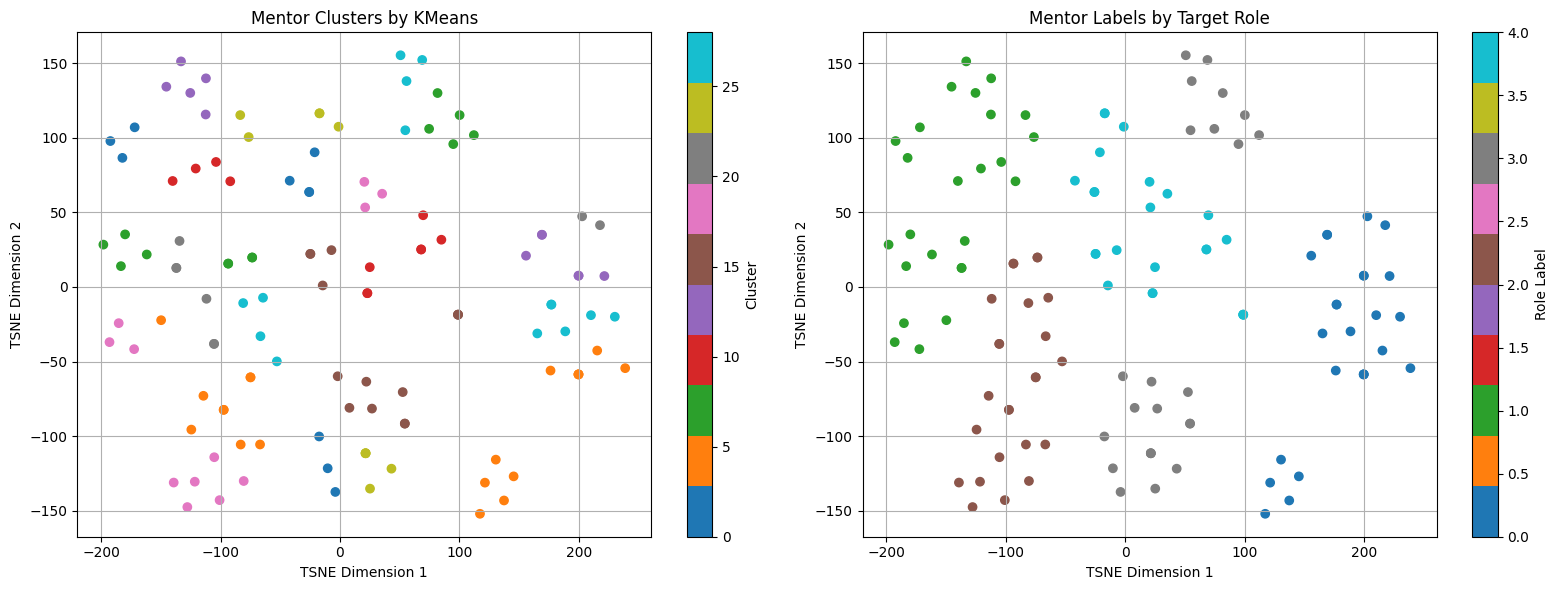

In [101]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(skills_df.values)

plt.figure(figsize=(16, 6))  # one wide figure with 2 subplots

# Subplot 1 — using cluster labels
plt.subplot(1, 2, 1)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=mentors_final_data["cluster"], cmap='tab10')
plt.title("Mentor Clusters by KMeans")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.colorbar(label='Cluster')
plt.grid(True)

# Subplot 2 — using target role labels
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=role_labels, cmap='tab10')
plt.title("Mentor Labels by Target Role")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.colorbar(label='Role Label')
plt.grid(True)

plt.tight_layout()
plt.show()

In [120]:
#predicting on a student

# Load student skill gap
student_data = pd.read_json("skill_gap_analysis.json")
skill_gap = student_data.iloc[1]["technical_skill_gap"]

# Ensure mlb is already fitted on your mentor skill data
student_skill_gap_vector = mlb.transform([skill_gap])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) [' ', '+', ',', 'A', 'B', 'C', 'D', 'E', 'I', 'J', 'L', 'M', 'N', 'P', 'S', 'T', 'V', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z'] will be ignored
  warnings.warn(


In [124]:
[skill_gap]

['Machine Learning, Artificial Intelligence, Data Analysis, C++, Java, Statistical Analysis, Data Visualization, Natural Language Processing, Computer Vision, Big Data Technologies, Software Development, Agile Methodologies, Data Management, Algorithm Development, Embedded Systems']